In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.special import gamma as gamma_fn
from matplotlib import rcParams as rc
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.integrate import simps
import matplotlib.ticker as ticker
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable

rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=2
rc['lines.markersize']=6
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

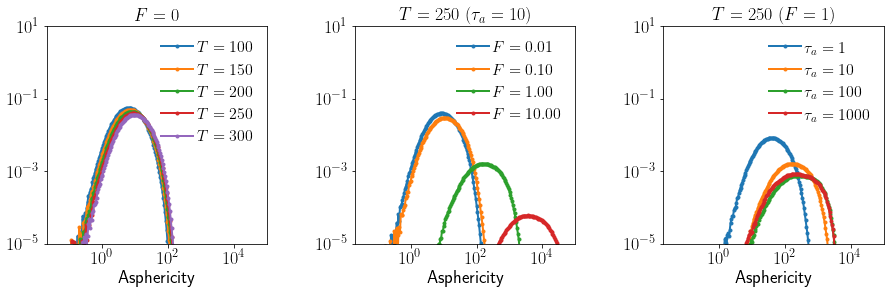

In [232]:
#plot bond lengths
fig,axes=plt.subplots(1,3,figsize=(15,4),gridspec_kw={'wspace':0.4, 'hspace':0.4,})
[ax1,ax2,ax3]=axes

ind=4
T0=100
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]
bonds=[]
par_av=[]
par='asph'
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        
        data_npz=np.load(fpath+fname)

        if Ta==1. and F==0:
            ax1.plot(data_npz[par][1],data_npz[par][0],'.-', label='$T={:.0f}$'.format(T))
            ax1.set_title('$F=0$')

            # print(data_npz[par][0].sum(),np.sum(data_npz['rg'][0]*data_npz['rg'][1]))

        if T==250. and Ta==10:
            ax2.plot(data_npz[par][1],data_npz[par][0],'.-', label='$F={:.2f}$'.format(F))
            ax2.set_title('$T={:.0f}\ (\\tau_a={:.0f})$'.format(T,Ta))

        if T==250. and F==1.0:
            ax3.plot(data_npz[par][1],data_npz[par][0],'.-', label='$\\tau_a={:.0f}$'.format(Ta))
            ax3.set_title('$T={:.0f}\ (F={:.0f})$'.format(T,F))

        if T==T0:
            X.append(F)
            Y.append(Ta)
            par_av.append(simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1]))
        # bonds.append(simps(data_npz['bins']*data_npz['hist'], data_npz['bins']))

# ax4.semilogx([xx**2*yy/(0.1*0.0083*300) for xx,yy in zip(X,Y)],rg_av,'.')

# ax1.set_xlim(0,5)
# ax3.set_xlim(0,5)
for ax in axes.flatten():
    ax.legend(loc='upper right', ncol=1,fontsize=16)
    ax.loglog()
    ax.set_xlabel('Asphericity')
    ax.set_xlim(2e-2,1e5)
    ax.set_ylim(1e-5,10)
    

plt.savefig('../../plots/Rouse/asphericity.png'.format(T0), dpi=300, bbox_inches='tight')

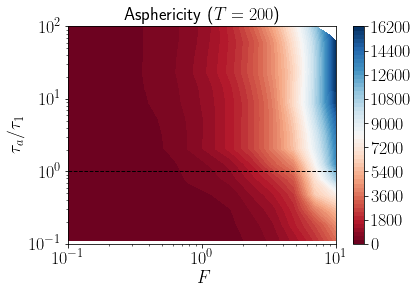

In [390]:
ind=4
T0=200
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]
bonds=[]
par_av=[]
par='asph'
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        if kb==5: continue
        data_npz=np.load(fpath+fname)
        if T==T0:
            t1=1e3/(kb*np.pi**2)
            X.append(F)
            Y.append(Ta/t1)
            par_av.append(simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1]))

Xi,Yi=np.meshgrid(np.logspace(-2,1,20),np.logspace(-2,2,20))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,par_av)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi,levels=np.arange(0,Zi.max()+100,300),cmap='RdBu')#,alpha=0.6)
        #ax.contour(Xi, Yi, Zi,colors='k',levels=levels,linewidths=0.3)
plt.semilogy()
plt.xlim(0.1,10)
plt.ylim(1e-1,1e2)
plt.title('Asphericity ($T={}$)'.format(T0))
plt.xlabel('$F$')
plt.ylabel('$\\tau_a/\\tau_1$')
plt.loglog()
plt.axhline(1,c='k',ls='--', lw=1)

plt.colorbar()

plt.savefig('../../plots/Rouse/asphericity_T{}.png'.format(T0), dpi=300, bbox_inches='tight')

In [336]:
d=[(1,2),(3,4),(8,3),[2,9]]
ds=sorted(d, key=lambda x:x[0])
print(ds)

[(1, 2), [2, 9], (3, 4), (8, 3)]


In [361]:
for ii in range(int(1200/100)):
    print(ii*100,(ii+1)*100-1,0)


0 99 0
100 199 0
200 299 0
300 399 0
400 499 0
500 599 0
600 699 0
700 799 0
800 899 0
900 999 0
1000 1099 0
1100 1199 0
